In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\afree\Documents\House_Price_Prediction\data\dataset.csv")

In [4]:
df.head()

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
0,8910,1194,Pave,NaN,Corner,1Fam,1Fam,6,6,1959,...,Y,1,0,BuiltIn,2,539.0,2006,WD,Normal,159500
1,1526,630,Pave,NaN,Inside,Twnhs,SFoyer,4,8,1970,...,Y,1,0,Attchd,1,286.0,2009,WD,Normal,86000
2,14598,1933,Pave,NaN,CulDSac,1Fam,2Story,6,5,2007,...,Y,2,1,BuiltIn,3,668.0,2008,WD,Normal,214000
3,7200,1040,Pave,NaN,Inside,Duplex,1Story,4,5,1949,...,N,2,0,Detchd,2,420.0,2009,WD,Normal,90000
4,5687,1716,Pave,Grvl,Inside,2fmCon,2Story,5,6,1912,...,N,2,0,NaN,0,0.0,2008,WD,Normal,135900


## Exploratory Data Analysis

In [5]:
df.shape # number of rows and columns

(1460, 22)

In [6]:
df.info()# get more information into the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1460 non-null   int64  
 1   GrLivArea         1460 non-null   int64  
 2   Street            1460 non-null   object 
 3   Alley             91 non-null     object 
 4   LotType           1460 non-null   object 
 5   BldgType          1460 non-null   object 
 6   HouseStyle        1460 non-null   object 
 7   OverallQuality    1460 non-null   int64  
 8   OverallCondition  1460 non-null   int64  
 9   YearBuilt         1460 non-null   int64  
 10  Foundation        1460 non-null   object 
 11  TotalBsmtSF       1460 non-null   int64  
 12  CentralAir        1460 non-null   object 
 13  FullBath          1460 non-null   int64  
 14  HalfBath          1460 non-null   int64  
 15  GarageType        1379 non-null   object 
 16  GarageCars        1460 non-null   int64  


In [7]:
df.select_dtypes(include='object').nunique()

Street           2
Alley            2
LotType          5
BldgType         5
HouseStyle       9
Foundation       7
CentralAir       2
GarageType       6
SaleType         9
SaleCondition    7
dtype: int64

In [8]:
df.describe() # statistics of the dataset

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,YearSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1417.000000,1460.000000,1460.000000
mean,10516.828082,1567.207534,6.099315,5.575342,1971.267808,1057.429452,1.565068,0.382877,1.767123,471.409315,2007.815753,180921.195890
std,9981.264932,1072.198454,1.382997,1.112799,30.202904,438.705324,0.550916,0.502885,0.747315,214.217863,1.328095,79442.502883
min,1300.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,7553.500000,1130.750000,5.000000,5.000000,1954.000000,795.750000,1.000000,0.000000,1.000000,326.000000,2007.000000,129975.000000
50%,9478.500000,1466.000000,6.000000,5.000000,1973.000000,991.500000,2.000000,0.000000,2.000000,478.000000,2008.000000,163000.000000
75%,11601.500000,1784.500000,7.000000,6.000000,2000.000000,1298.250000,2.000000,1.000000,2.000000,576.000000,2009.000000,214000.000000
max,215245.000000,23400.000000,10.000000,9.000000,2010.000000,6110.000000,3.000000,2.000000,4.000000,1418.000000,2010.000000,755000.000000


In [9]:
df.isna().sum() #to see which columns have how many missing values 

LotArea                0
GrLivArea              0
Street                 0
Alley               1369
LotType                0
BldgType               0
HouseStyle             0
OverallQuality         0
OverallCondition       0
YearBuilt              0
Foundation             0
TotalBsmtSF            0
CentralAir             0
FullBath               0
HalfBath               0
GarageType            81
GarageCars             0
GarageArea            43
YearSold               0
SaleType               0
SaleCondition          0
SalePrice              0
dtype: int64

In [10]:
(df.isna().sum()/len(df))*100 # to see the percentage of missing values in each column

LotArea              0.000000
GrLivArea            0.000000
Street               0.000000
Alley               93.767123
LotType              0.000000
BldgType             0.000000
HouseStyle           0.000000
OverallQuality       0.000000
OverallCondition     0.000000
YearBuilt            0.000000
Foundation           0.000000
TotalBsmtSF          0.000000
CentralAir           0.000000
FullBath             0.000000
HalfBath             0.000000
GarageType           5.547945
GarageCars           0.000000
GarageArea           2.945205
YearSold             0.000000
SaleType             0.000000
SaleCondition        0.000000
SalePrice            0.000000
dtype: float64

In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 22)


At first glance we see that there are no duplicate rows and that the column Alley is missing around 94 percent of its data which is a lot of data whereas both GarageType and GarageArea are missing around 5 and 3 percent respectively which is small enough which we will address in the feature engineering

## VISUALIZATIONS

In [12]:
df.columns

Index(['LotArea', 'GrLivArea', 'Street', 'Alley', 'LotType', 'BldgType',
       'HouseStyle', 'OverallQuality', 'OverallCondition', 'YearBuilt',
       'Foundation', 'TotalBsmtSF', 'CentralAir', 'FullBath', 'HalfBath',
       'GarageType', 'GarageCars', 'GarageArea', 'YearSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

### Here our target variable is SalePrice , Lets analyze this first 

<Axes: xlabel='SalePrice'>

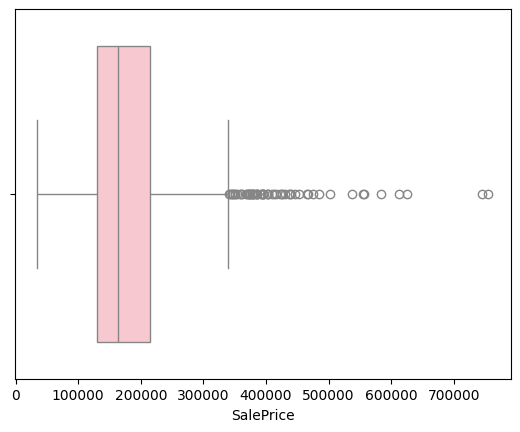

In [13]:
sns.boxplot(x='SalePrice',data = df,color='pink') # distribution of the SalePrice

From the above graph we can see that majority of the data lies between 100k to 200k and that there are some outliers after 400k 

<Axes: xlabel='SalePrice', ylabel='Count'>

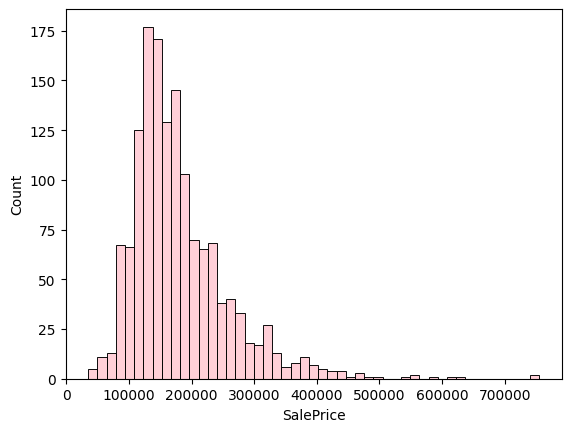

In [14]:
sns.histplot(data=df,x='SalePrice',color='pink')

This histogram shows that SalePrice has a gaussian distribution and this graph also confirms the observations in the previous graph 

In [15]:
## Splitting between numerical and categorical features 
#numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='O'and feature !='SalePrice']
df[numerical_features]


,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,YearSold
0,8910,1194,6,6,1959,655,1,0,2,539.0,2006
1,1526,630,4,8,1970,630,1,0,1,286.0,2009
2,14598,1933,6,5,2007,894,2,1,3,668.0,2008
3,7200,1040,4,5,1949,0,2,0,2,420.0,2009
4,5687,1716,5,6,1912,780,2,0,0,0.0,2008
...,...,...,...,...,...,...,...,...,...,...,...
1455,6000,960,4,4,1920,960,1,0,1,308.0,2007
1456,12150,1795,5,5,1954,1050,2,0,1,352.0,2008
1457,10200,1086,5,7,1954,1086,1,0,2,490.0,2010
1458,8400,841,4,4,1950,721,1,0,1,294.0,2009


In [16]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes =='O']
df[categorical_features]

,Street,Alley,LotType,BldgType,HouseStyle,Foundation,CentralAir,GarageType,SaleType,SaleCondition
0,Pave,NaN,Corner,1Fam,1Fam,CBlock,Y,BuiltIn,WD,Normal
1,Pave,NaN,Inside,Twnhs,SFoyer,CBlock,Y,Attchd,WD,Normal
2,Pave,NaN,CulDSac,1Fam,2Story,PConc,Y,BuiltIn,WD,Normal
3,Pave,NaN,Inside,Duplex,1Story,Slab,N,Detchd,WD,Normal
4,Pave,Grvl,Inside,2fmCon,2Story,PConc,N,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Pave,NaN,Inside,1Fam,1Story,PConc,Y,Detchd,WD,Normal
1456,Pave,Grvl,Inside,1Fam,1.5Fin,BrkTil,N,Attchd,WD,Normal
1457,Pave,NaN,Inside,1Fam,1Story,Do Not use this Field in the Model,Y,Attchd,WD,Normal
1458,Pave,NaN,Inside,1Fam,1Story,CBlock,Y,CarPort,WD,Normal


### Splitting the Numerical features into time , discrete and continuous variables for easy visualization

In [17]:
#time features
time_features = ['YearBuilt', 'YearSold']
df[time_features].head()

,YearBuilt,YearSold
0,1959,2006
1,1970,2009
2,2007,2008
3,1949,2009
4,1912,2008


In [18]:
print(df[time_features].nunique(),'\n')
for feature in time_features:
    print(f"Unique values in {feature}:")
    print(df[feature].unique(),'\n')

YearBuilt    112
YearSold       5
dtype: int64 

Unique values in YearBuilt:
[1959 1970 2007 1949 1912 1948 1953 2004 1955 1986 1964 2003 1920 2005
 1976 1929 1975 1963 1898 2002 1892 1973 1998 1932 1999 2008 1974 1957
 1958 1962 1984 1997 1961 1977 1926 1922 2001 1941 1992 1925 2006 1993
 1940 1966 1935 1968 1950 1956 1965 1939 1969 1936 1923 1938 1915 1972
 1906 1937 1989 1983 1995 1994 1954 1942 1910 1996 1971 1931 1927 1921
 1928 2009 1960 1880 2000 1990 1985 1916 1914 1952 1991 1951 1967 1978
 1945 1946 1979 1947 1930 1981 1980 1900 1924 1919 1987 1917 1890 1918
 1872 1988 1911 1893 1982 1934 1908 1905 1875 1885 1904 1913 1882 2010] 

Unique values in YearSold:
[2006 2009 2008 2007 2010] 



In [19]:
#discete features 
discrete_features = [feature for feature in numerical_features if df[feature].nunique()<25 and df[feature].dtype!='float' and feature not in time_features]
df[discrete_features]


,OverallQuality,OverallCondition,FullBath,HalfBath,GarageCars
0,6,6,1,0,2
1,4,8,1,0,1
2,6,5,2,1,3
3,4,5,2,0,2
4,5,6,2,0,0
...,...,...,...,...,...
1455,4,4,1,0,1
1456,5,5,2,0,1
1457,5,7,1,0,2
1458,4,4,1,0,1


In [20]:
print(df[discrete_features].nunique(),'\n')
for feature in discrete_features:
    print(f"Unique values in {feature}:")
    print(df[feature].unique(),'\n')

OverallQuality      10
OverallCondition     9
FullBath             4
HalfBath             3
GarageCars           5
dtype: int64 

Unique values in OverallQuality:
[ 6  4  5  7  8 10  3  9  2  1] 

Unique values in OverallCondition:
[6 8 5 7 4 9 3 1 2] 

Unique values in FullBath:
[1 2 3 0] 

Unique values in HalfBath:
[0 1 2] 

Unique values in GarageCars:
[2 1 3 0 4] 



In [21]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_features and feature not in time_features] 
df[continuous_feature]

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8910,1194,655,539.0
1,1526,630,630,286.0
2,14598,1933,894,668.0
3,7200,1040,0,420.0
4,5687,1716,780,0.0
...,...,...,...,...
1455,6000,960,960,308.0
1456,12150,1795,1050,352.0
1457,10200,1086,1086,490.0
1458,8400,841,721,294.0


#### Discrete Feature Analysis

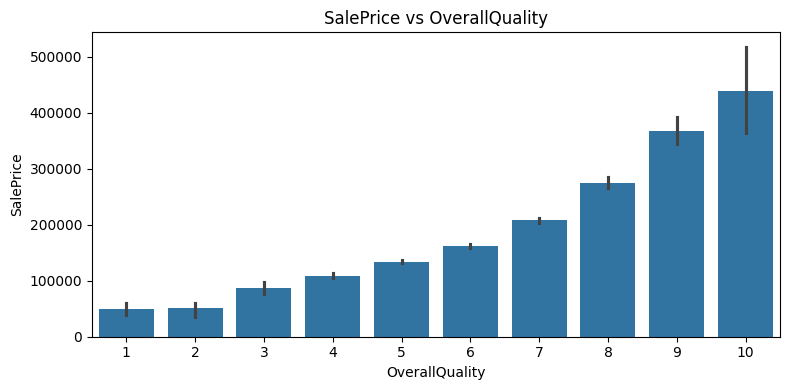

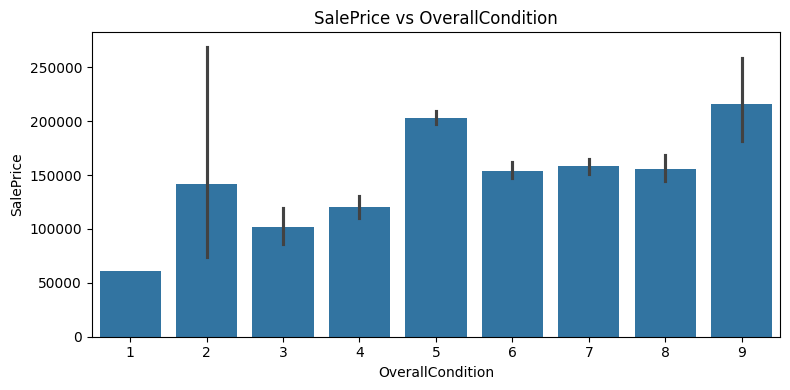

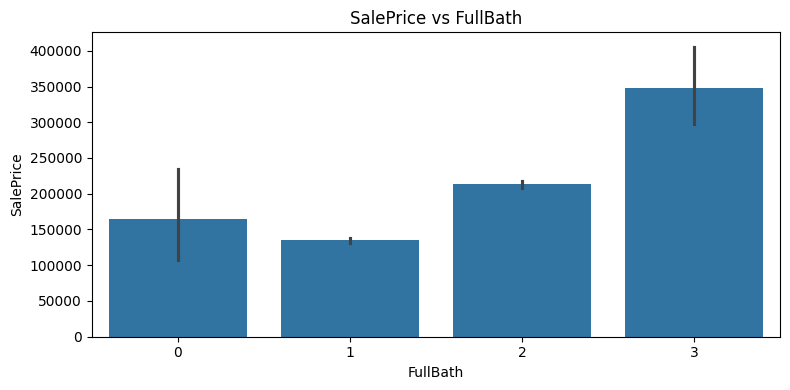

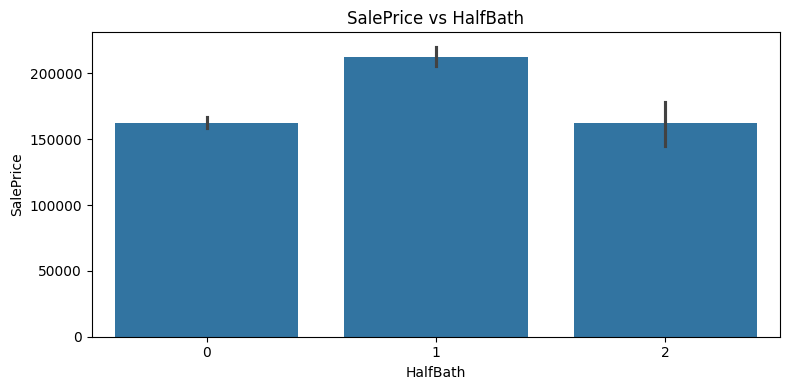

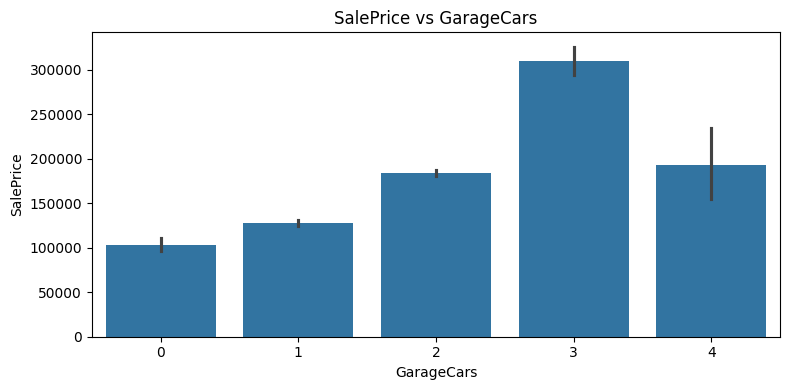

In [22]:
for feature in discrete_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show() 

From the above graphs we can see that there is a clear pattern between overall quality and  sale price where you can see that as the quality increases so does the sale price which shows that there is a positive relation between them. This means that high quality homes are sold at more expensive rates

The same can also be said for houses with full baths as the number of full baths increases so does the price of the houses.

For the overall condtion feature graph we dont see a clear relationship with sale price this could be because of a number of reasons since we expect the case to be that as the overall condition increases so does the sale price. Houses with overall condition till 5 we see almost positive relationship and then houses with over condition 6,7,8 the sale price show that it is lesser than 5 which could be because of other factores being involved like location, house type etc

Again we dont see a consistent pattern for houses with half bath or garage cars which will also expect to see an increasing postive relationship which could be influenced by otehr factors like house type, or garage area etc.

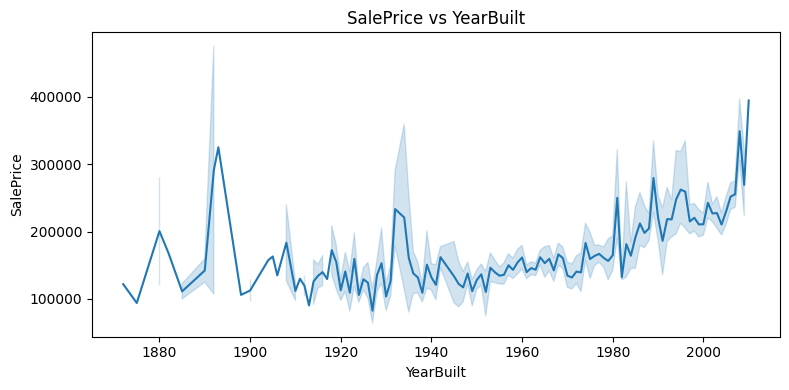

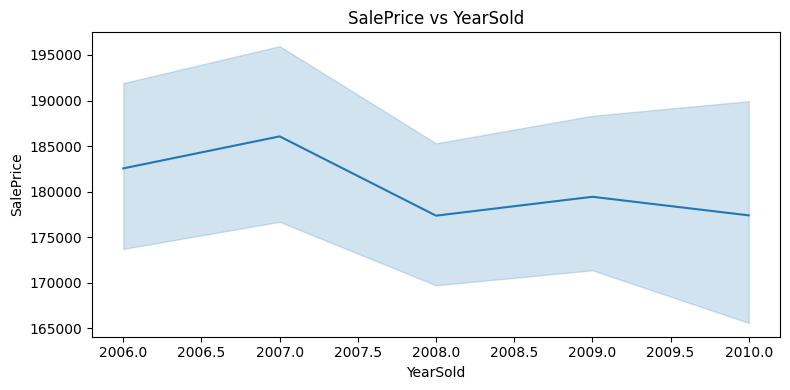

In [23]:
for feature in time_features:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show() 

From the above graphs we see that according to the year built feature as the year built increases so does the price which means the more recent the house is the more expensive it was. 

The year sold graph is shwoing an unusual decreasing trend which is different from the expected trend since as the years go by houses are more expensive.


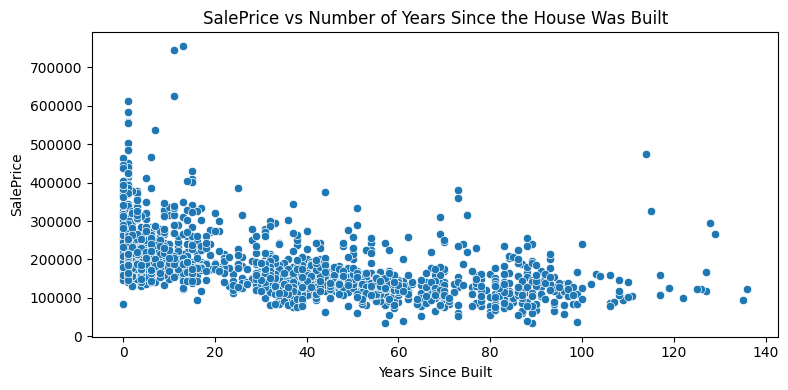

In [49]:
# graph to see how many years has it been since each house has been built

plt.figure(figsize=(8, 4))

df1 = df.copy()
df1['House_Age'] = df1['YearSold'] - df1['YearBuilt']

sns.scatterplot(data=df1, x='House_Age', y='SalePrice')
plt.title('SalePrice vs Number of Years Since the House Was Built')
plt.xlabel('Years Since Built')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

Here we see that there is a clear decreasing trend the more recent houses are sold at higher prices whereas older houses are lower prices

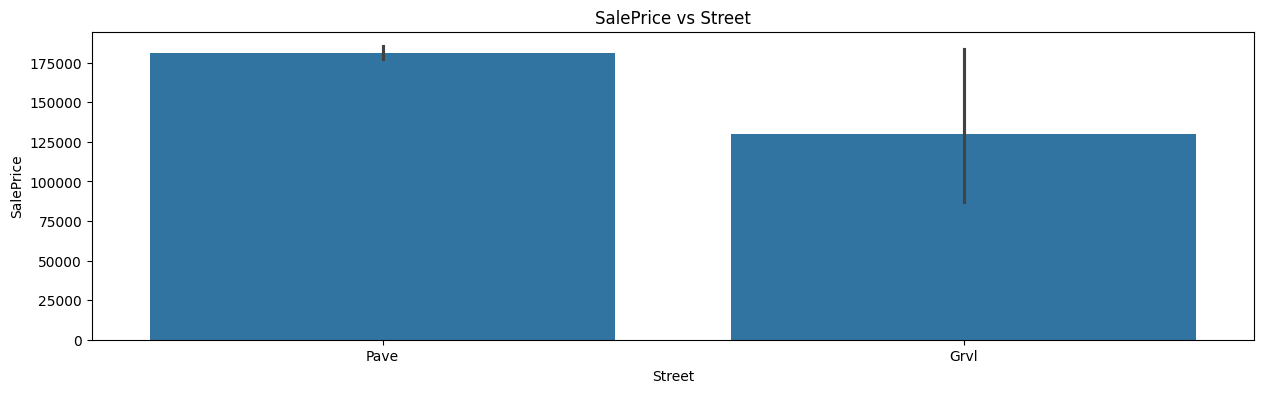

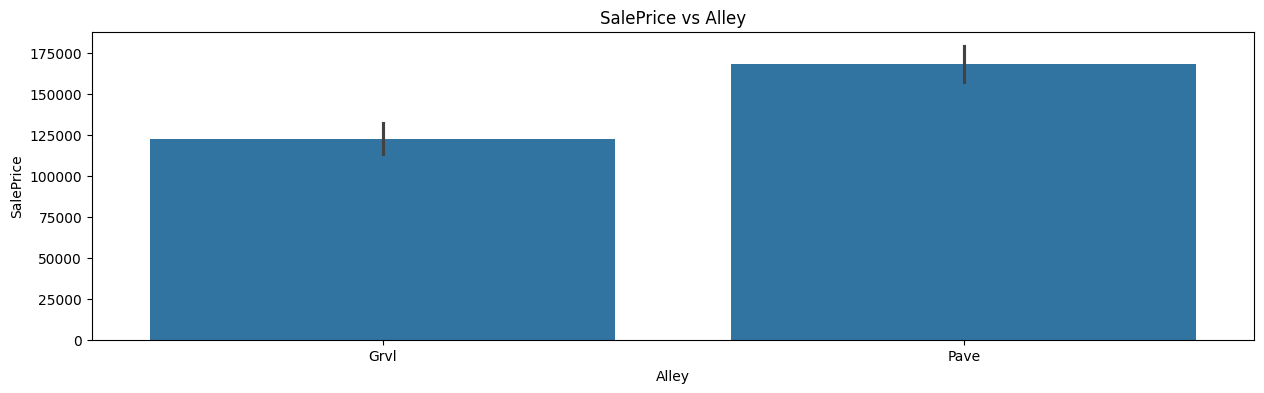

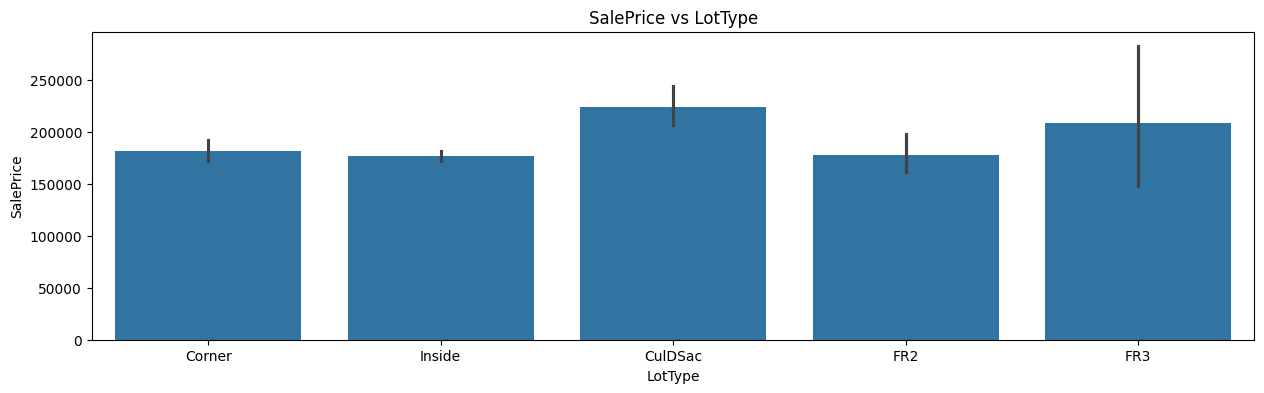

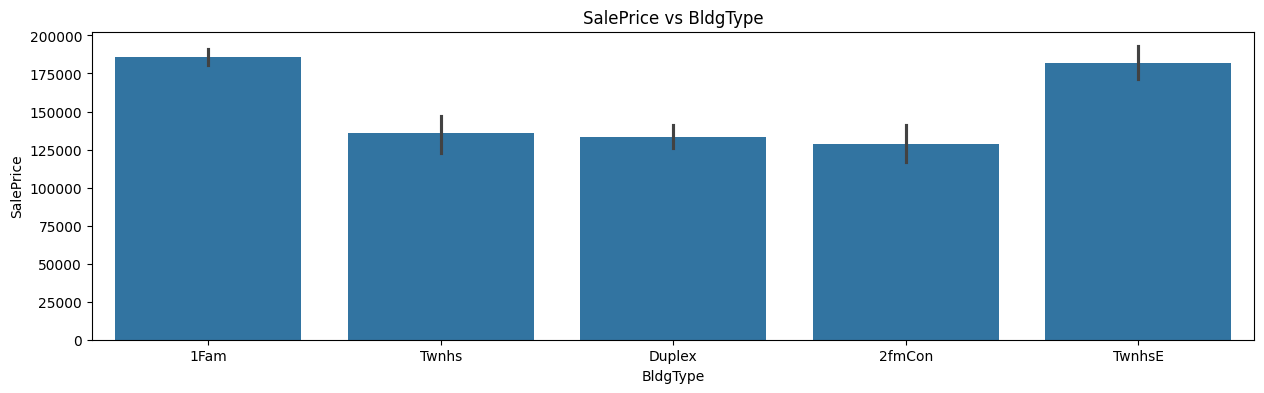

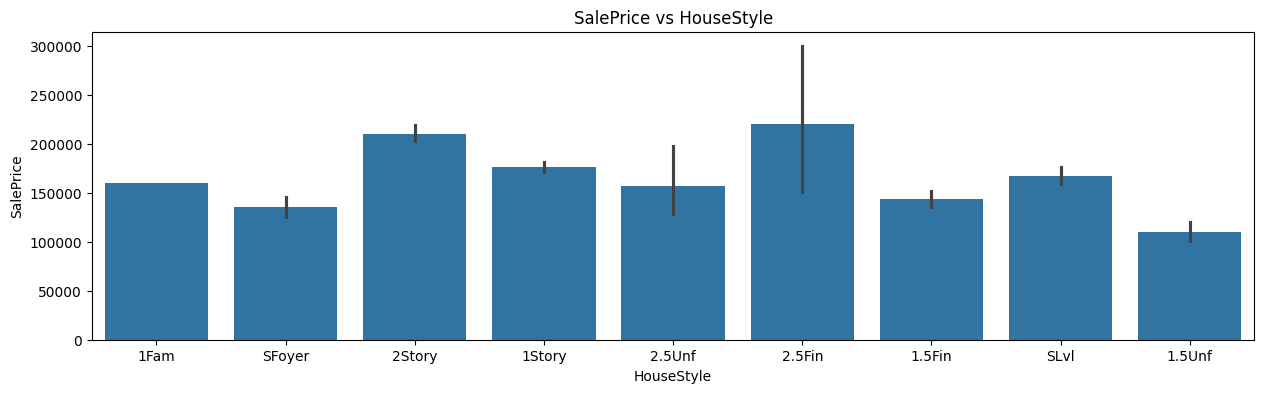

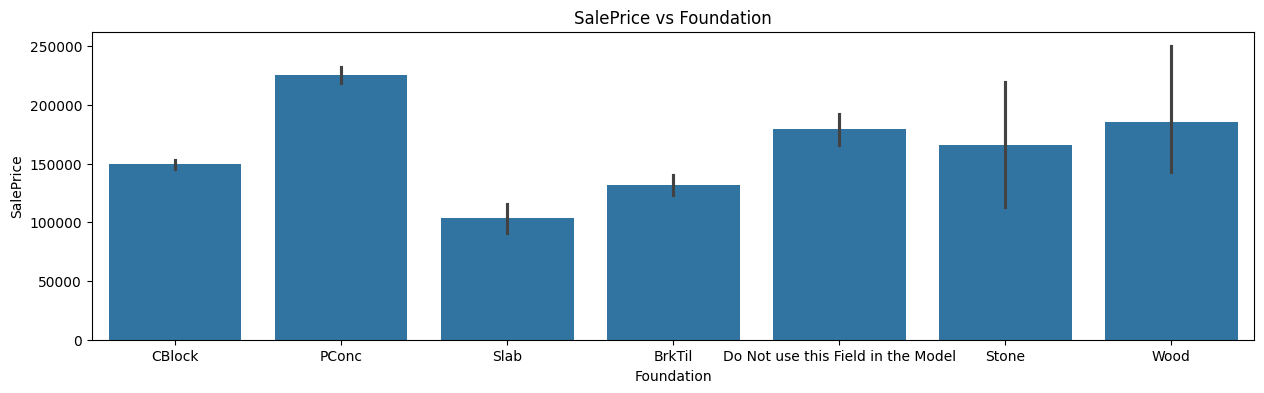

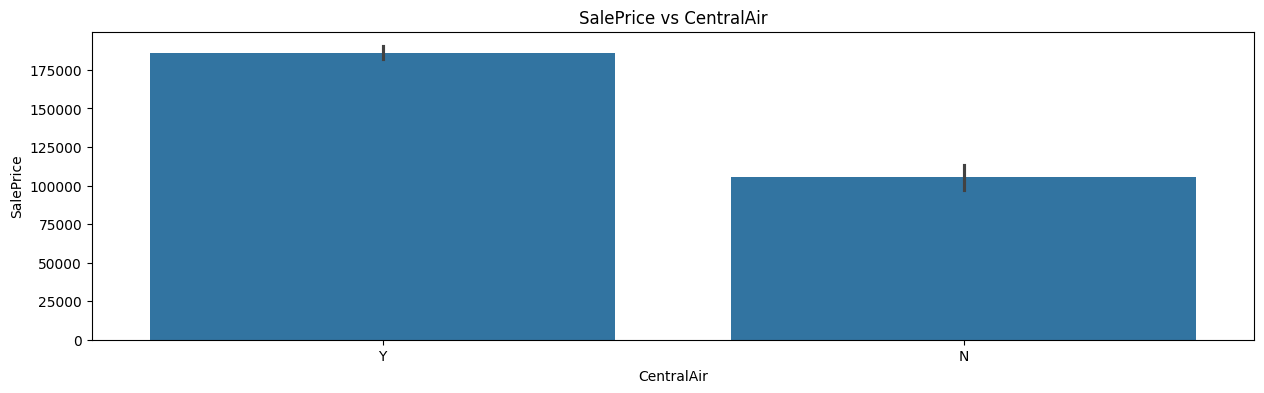

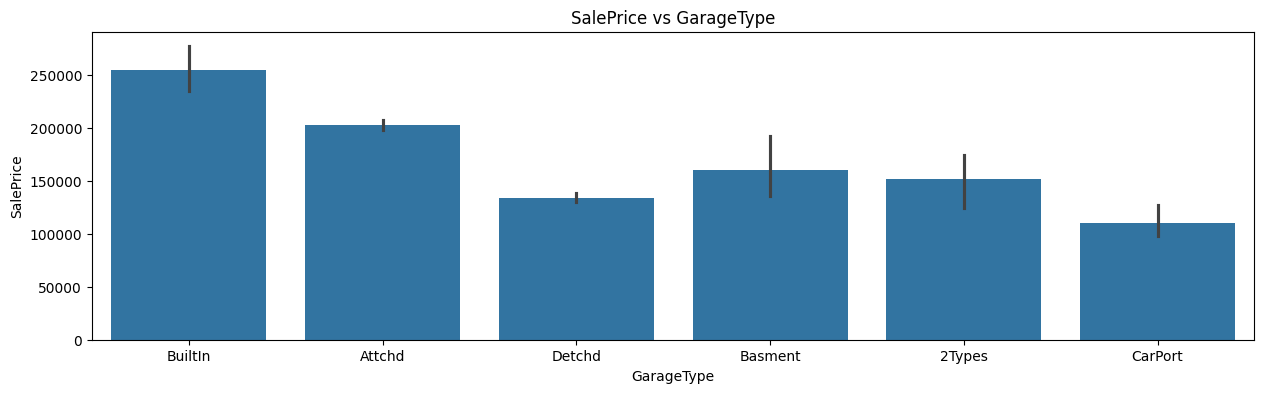

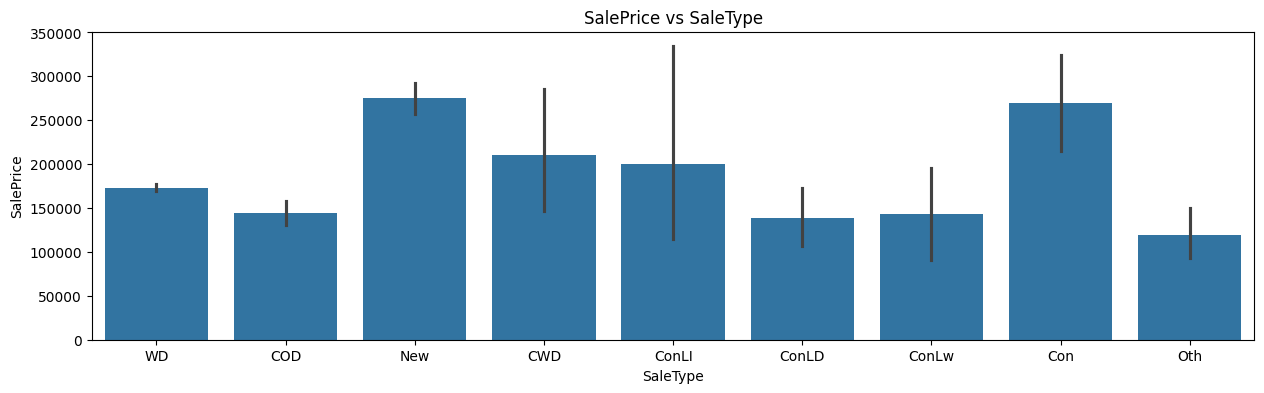

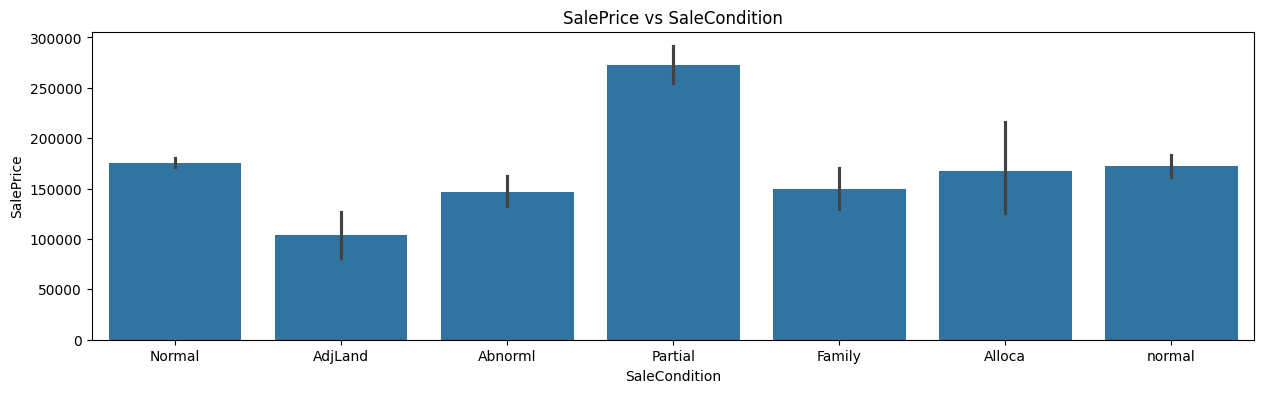

In [24]:
for feature in categorical_features:
    plt.figure(figsize=(15,4))
    sns.barplot(data=df,x=feature,y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

We can make the following observations from these graphs:

1. The houses on Pave street seems to be more expensive as compared to Grvl street probably because its a more luxurious area
2. we see that houses with lot type CulDSac is more expensive probably due to less traffic  
3. 1fam and townhouse seems to be more expensive as compared to other building types maybe because of factors like higher demand or more privacy
4. 2.5fin the most expensive house style likely because of the additional space and otehr factors
5. Houses with central air conditioning are definitely more desirable which is probably why their sales price is higher
6. Houses with Builtin Garages are more expensive
7. sale type that convention or new and sale condition that is partial is more expensive

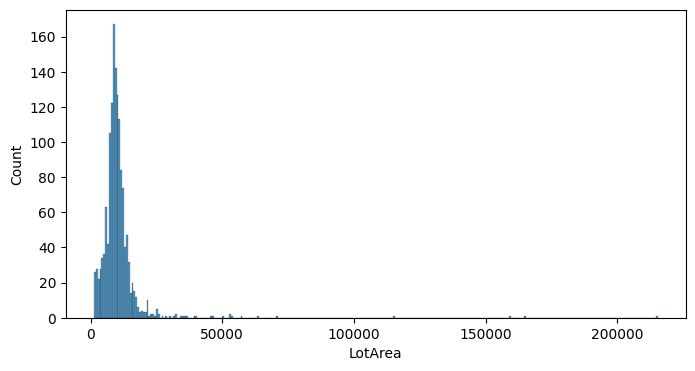

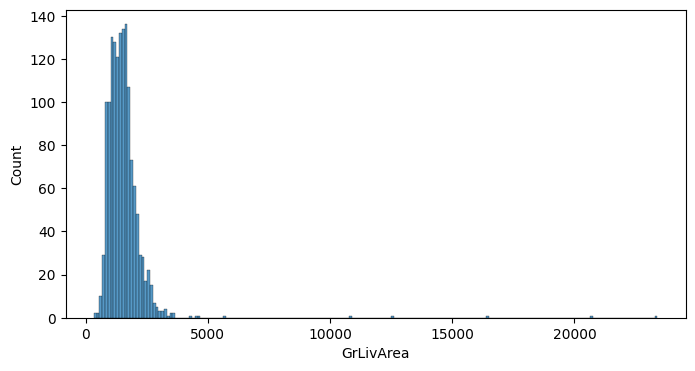

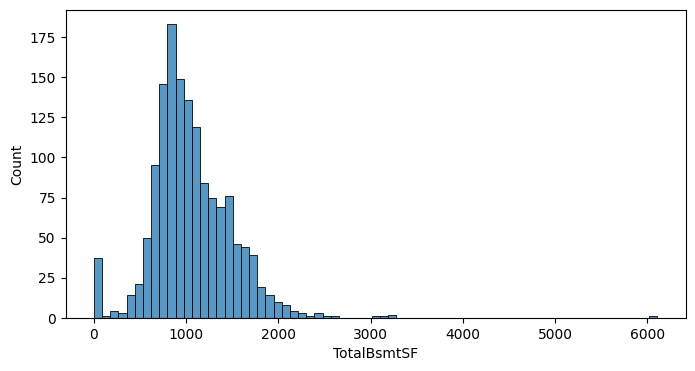

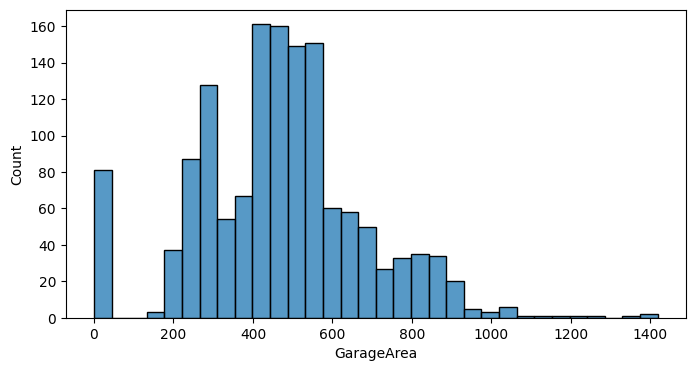

: 

: 

: 

: 

: 

In [ ]:
for feature in continuous_feature:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df,x=feature)
    plt.show()

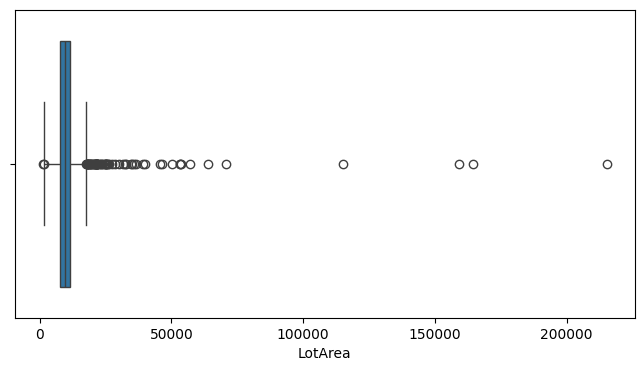

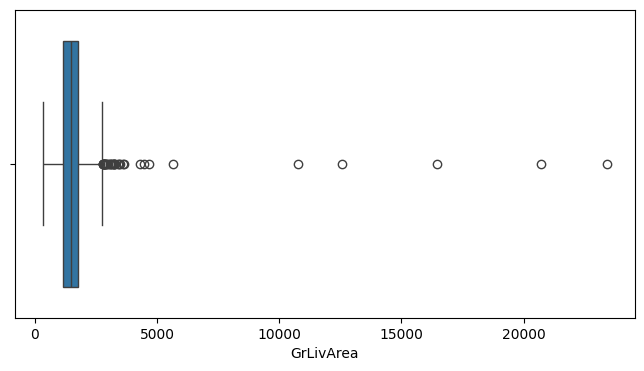

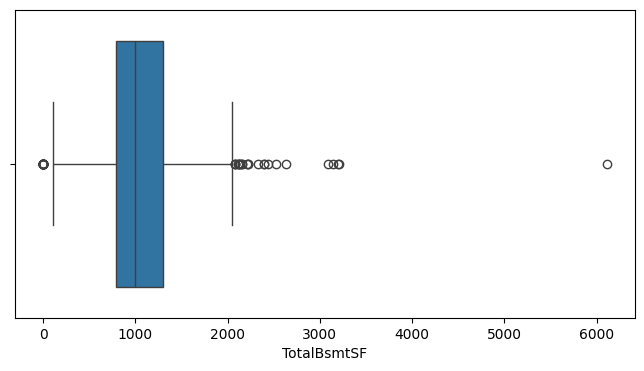

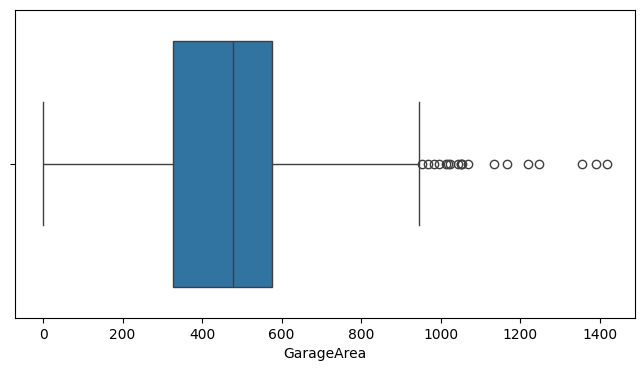

In [25]:
for feature in continuous_feature:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df,x=feature)
    plt.show()

From the above graphs you can see that all the continuous variables are normally distributed but has a lot of outliers

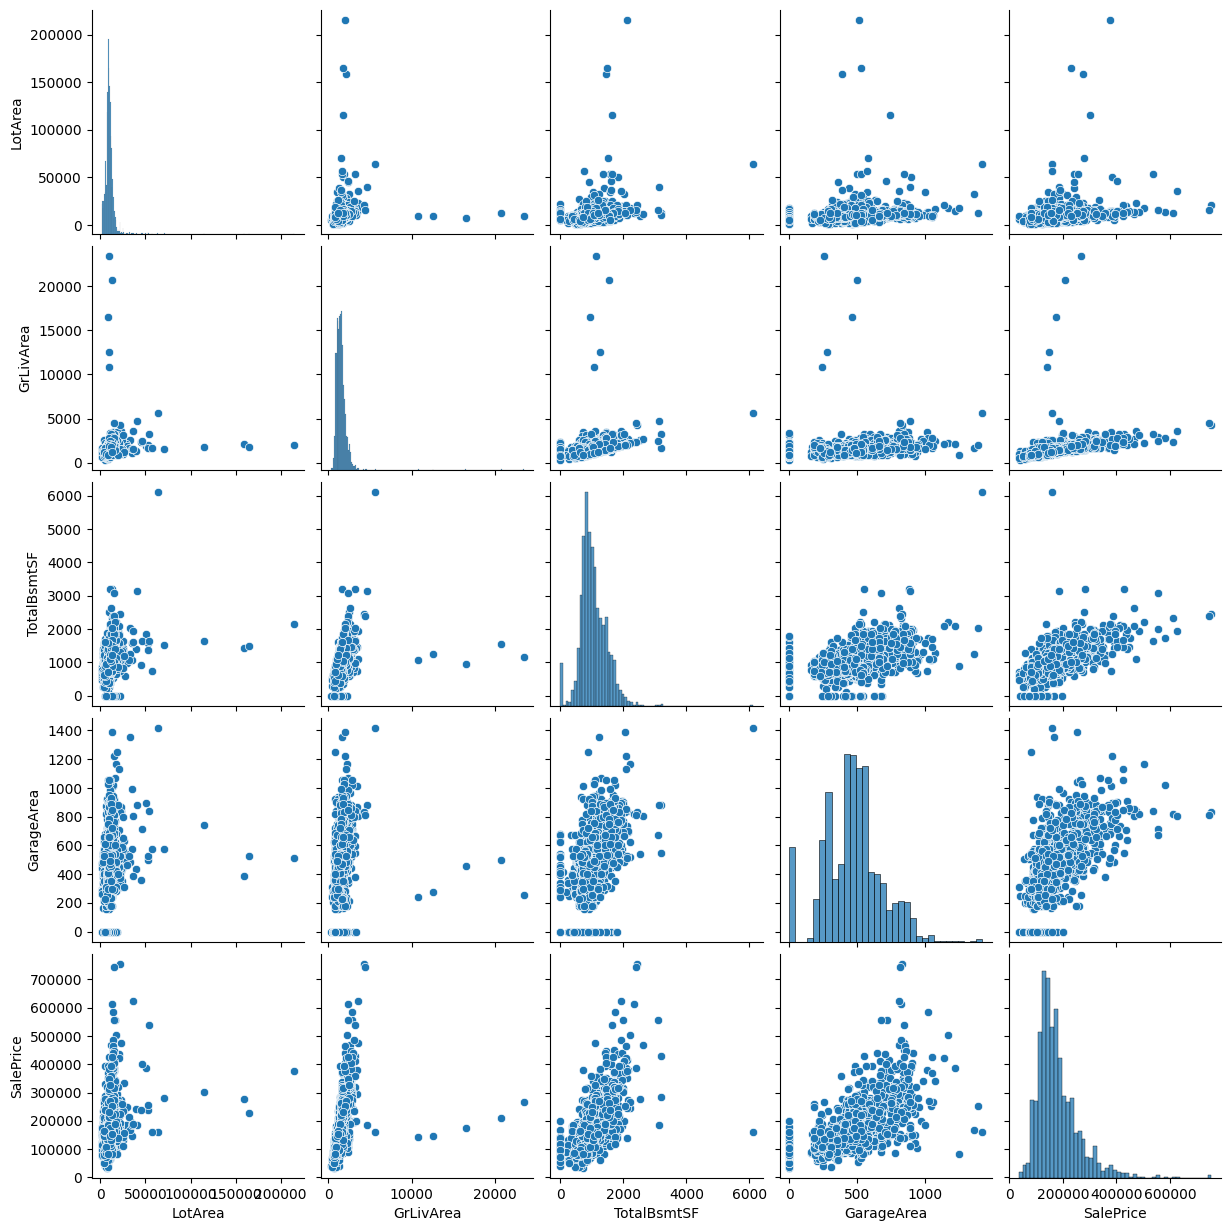

In [26]:
continuous_feature.append('SalePrice')
sns.pairplot(df[continuous_feature])

In the above pairplot if we look at the last column we see that they have positive relationships with the saleprice which means as these features increase so does the sales price

<Axes: >

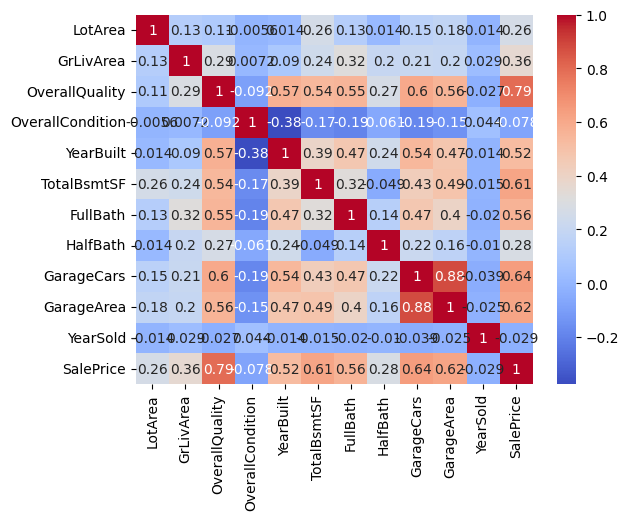

In [27]:
numerical_features.append('SalePrice')
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

From this plot we see that Overall quality and Overall condition are the most positively correlated to saleprice which means that these are the most influential factors in the salesprice and year sold is one that is negatively correlated with sales price which will already discovered before 

In [28]:
df

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
0,8910,1194,Pave,NaN,Corner,1Fam,1Fam,6,6,1959,...,Y,1,0,BuiltIn,2,539.0,2006,WD,Normal,159500
1,1526,630,Pave,NaN,Inside,Twnhs,SFoyer,4,8,1970,...,Y,1,0,Attchd,1,286.0,2009,WD,Normal,86000
2,14598,1933,Pave,NaN,CulDSac,1Fam,2Story,6,5,2007,...,Y,2,1,BuiltIn,3,668.0,2008,WD,Normal,214000
3,7200,1040,Pave,NaN,Inside,Duplex,1Story,4,5,1949,...,N,2,0,Detchd,2,420.0,2009,WD,Normal,90000
4,5687,1716,Pave,Grvl,Inside,2fmCon,2Story,5,6,1912,...,N,2,0,NaN,0,0.0,2008,WD,Normal,135900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6000,960,Pave,NaN,Inside,1Fam,1Story,4,4,1920,...,Y,1,0,Detchd,1,308.0,2007,WD,Normal,108500
1456,12150,1795,Pave,Grvl,Inside,1Fam,1.5Fin,5,5,1954,...,N,2,0,Attchd,1,352.0,2008,WD,Normal,131500
1457,10200,1086,Pave,NaN,Inside,1Fam,1Story,5,7,1954,...,Y,1,0,Attchd,2,490.0,2010,WD,Normal,144900
1458,8400,841,Pave,NaN,Inside,1Fam,1Story,4,4,1950,...,Y,1,0,CarPort,1,294.0,2009,WD,Normal,82000


## SPLITTING DATA INT0 TRAIN AND TEST

In [405]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,df['SalePrice'],test_size=0.3,random_state=42)

In [406]:
X_train

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
135,1596,988,Pave,NaN,Inside,Twnhs,SLvl,4,5,1973,...,Y,1,0,BuiltIn,1,297.0,2009,WD,Normal,91000
1452,5500,882,Pave,NaN,Inside,1Fam,1.5Unf,4,6,1956,...,Y,1,0,NaN,0,0.0,2007,WD,Normal,103200
762,6600,816,Pave,NaN,Inside,1Fam,1Story,5,9,1982,...,Y,1,0,Attchd,1,264.0,2008,WD,normal,130500
932,12772,958,Pave,NaN,CulDSac,1Fam,1Story,6,8,1960,...,Y,1,0,Attchd,1,301.0,2007,WD,Normal,151500
435,17500,1902,Pave,NaN,Inside,1Fam,1Story,7,8,1959,...,Y,2,0,Attchd,2,567.0,2010,WD,Normal,335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14115,1811,Pave,NaN,Inside,1Fam,1Story,6,7,1956,...,Y,1,0,Attchd,2,470.0,2006,WD,Abnorml,230000
1130,8688,1616,Pave,NaN,Inside,1Fam,1Story,7,5,2005,...,Y,2,0,Attchd,3,834.0,2006,WD,Normal,232000
1294,8765,951,Pave,Grvl,Inside,1Fam,1Story,4,6,1936,...,N,1,0,Detchd,1,327.0,2006,WD,Abnorml,106500
860,8737,1635,Pave,NaN,Inside,1Fam,1.5Fin,6,7,1923,...,Y,1,1,Detchd,2,440.0,2007,WD,Normal,210000


In [407]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 135 to 1126
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1022 non-null   int64  
 1   GrLivArea         1022 non-null   int64  
 2   Street            1022 non-null   object 
 3   Alley             61 non-null     object 
 4   LotType           1022 non-null   object 
 5   BldgType          1022 non-null   object 
 6   HouseStyle        1022 non-null   object 
 7   OverallQuality    1022 non-null   int64  
 8   OverallCondition  1022 non-null   int64  
 9   YearBuilt         1022 non-null   int64  
 10  Foundation        1022 non-null   object 
 11  TotalBsmtSF       1022 non-null   int64  
 12  CentralAir        1022 non-null   object 
 13  FullBath          1022 non-null   int64  
 14  HalfBath          1022 non-null   int64  
 15  GarageType        966 non-null    object 
 16  GarageCars        1022 non-null   int64  
 17

In [408]:
X_test

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
892,10708,1867,Pave,NaN,Inside,1Fam,1Story,5,5,1955,...,Y,1,0,Attchd,1,303.0,2009,COD,Normal,190000
1105,15623,4476,Pave,NaN,Corner,1Fam,2Story,10,5,1996,...,Y,3,1,Attchd,3,813.0,2007,WD,Abnorml,745000
413,7015,1203,Pave,NaN,Corner,1Fam,1.5Fin,5,4,1950,...,Y,1,0,Detchd,1,352.0,2009,WD,Normal,110000
522,9056,1414,Pave,NaN,Inside,1Fam,2Story,8,5,2004,...,Y,2,1,Attchd,2,403.0,2006,WD,Normal,178000
1036,13501,1636,Pave,NaN,Corner,1Fam,1Story,8,5,2006,...,Y,2,0,Attchd,3,865.0,2007,WD,Normal,255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,10289,1073,Pave,NaN,Inside,1Fam,1Story,5,7,1965,...,Y,1,1,Attchd,2,515.0,2007,WD,Normal,156000
323,9786,1734,Pave,NaN,Inside,1Fam,1.5Fin,6,7,1962,...,Y,1,1,Attchd,2,440.0,2006,WD,Normal,159000
650,9500,1977,Pave,NaN,Corner,1Fam,2Story,6,6,1964,...,Y,1,1,Attchd,2,540.0,2007,WD,normal,165000
439,12919,2364,Pave,NaN,Inside,1Fam,1Story,9,5,2009,...,Y,2,1,Attchd,3,820.0,2010,New,Partial,611657


In [409]:
y_train

135      91000
1452    103200
762     130500
932     151500
435     335000
         ...  
1095    230000
1130    232000
1294    106500
860     210000
1126    157000
Name: SalePrice, Length: 1022, dtype: int64

In [410]:
y_test

892     190000
1105    745000
413     110000
522     178000
1036    255000
         ...  
331     156000
323     159000
650     165000
439     611657
798     178000
Name: SalePrice, Length: 438, dtype: int64

## FEATURE ENGINEERING

### Handling missing values

In [411]:
# Categorical Variable with missing value
X_train['Alley']=X_train['Alley'].fillna('Unknown')
X_train['GarageType']=X_train['GarageType'].fillna('Unknown')

X_test['Alley'] = X_test['Alley'].fillna('Unknown')
X_test['GarageType'] = X_test['GarageType'].fillna('Unknown')

print("Missing values in X_train after filling:", X_train.isnull().sum())
print("Missing values in X_test after filling:", X_test.isnull().sum())


Missing values in X_train after filling: LotArea              0
GrLivArea            0
Street               0
Alley                0
LotType              0
BldgType             0
HouseStyle           0
OverallQuality       0
OverallCondition     0
YearBuilt            0
Foundation           0
TotalBsmtSF          0
CentralAir           0
FullBath             0
HalfBath             0
GarageType           0
GarageCars           0
GarageArea          27
YearSold             0
SaleType             0
SaleCondition        0
SalePrice            0
dtype: int64
Missing values in X_test after filling: LotArea              0
GrLivArea            0
Street               0
Alley                0
LotType              0
BldgType             0
HouseStyle           0
OverallQuality       0
OverallCondition     0
YearBuilt            0
Foundation           0
TotalBsmtSF          0
CentralAir           0
FullBath             0
HalfBath             0
GarageType           0
GarageCars           0
GarageAre

In [412]:
X_train

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
135,1596,988,Pave,Unknown,Inside,Twnhs,SLvl,4,5,1973,...,Y,1,0,BuiltIn,1,297.0,2009,WD,Normal,91000
1452,5500,882,Pave,Unknown,Inside,1Fam,1.5Unf,4,6,1956,...,Y,1,0,Unknown,0,0.0,2007,WD,Normal,103200
762,6600,816,Pave,Unknown,Inside,1Fam,1Story,5,9,1982,...,Y,1,0,Attchd,1,264.0,2008,WD,normal,130500
932,12772,958,Pave,Unknown,CulDSac,1Fam,1Story,6,8,1960,...,Y,1,0,Attchd,1,301.0,2007,WD,Normal,151500
435,17500,1902,Pave,Unknown,Inside,1Fam,1Story,7,8,1959,...,Y,2,0,Attchd,2,567.0,2010,WD,Normal,335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14115,1811,Pave,Unknown,Inside,1Fam,1Story,6,7,1956,...,Y,1,0,Attchd,2,470.0,2006,WD,Abnorml,230000
1130,8688,1616,Pave,Unknown,Inside,1Fam,1Story,7,5,2005,...,Y,2,0,Attchd,3,834.0,2006,WD,Normal,232000
1294,8765,951,Pave,Grvl,Inside,1Fam,1Story,4,6,1936,...,N,1,0,Detchd,1,327.0,2006,WD,Abnorml,106500
860,8737,1635,Pave,Unknown,Inside,1Fam,1.5Fin,6,7,1923,...,Y,1,1,Detchd,2,440.0,2007,WD,Normal,210000


In [413]:
# handling the numerical feature by replacing na values with median since it has a lot of outliers 
X_train['GarageArea']=X_train['GarageArea'].fillna(X_train['GarageArea'].median())

X_test['GarageArea'] = X_test['GarageArea'].fillna(X_train['GarageArea'].median())  

print("Missing values in X_train after filling:", X_train.isnull().sum())
print("Missing values in X_test after filling:", X_test.isnull().sum())


Missing values in X_train after filling: LotArea             0
GrLivArea           0
Street              0
Alley               0
LotType             0
BldgType            0
HouseStyle          0
OverallQuality      0
OverallCondition    0
YearBuilt           0
Foundation          0
TotalBsmtSF         0
CentralAir          0
FullBath            0
HalfBath            0
GarageType          0
GarageCars          0
GarageArea          0
YearSold            0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64
Missing values in X_test after filling: LotArea             0
GrLivArea           0
Street              0
Alley               0
LotType             0
BldgType            0
HouseStyle          0
OverallQuality      0
OverallCondition    0
YearBuilt           0
Foundation          0
TotalBsmtSF         0
CentralAir          0
FullBath            0
HalfBath            0
GarageType          0
GarageCars          0
GarageArea          0
YearSold            0
Sale

In [414]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 135 to 1126
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1022 non-null   int64  
 1   GrLivArea         1022 non-null   int64  
 2   Street            1022 non-null   object 
 3   Alley             1022 non-null   object 
 4   LotType           1022 non-null   object 
 5   BldgType          1022 non-null   object 
 6   HouseStyle        1022 non-null   object 
 7   OverallQuality    1022 non-null   int64  
 8   OverallCondition  1022 non-null   int64  
 9   YearBuilt         1022 non-null   int64  
 10  Foundation        1022 non-null   object 
 11  TotalBsmtSF       1022 non-null   int64  
 12  CentralAir        1022 non-null   object 
 13  FullBath          1022 non-null   int64  
 14  HalfBath          1022 non-null   int64  
 15  GarageType        1022 non-null   object 
 16  GarageCars        1022 non-null   int64  
 17

In [415]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 892 to 798
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           438 non-null    int64  
 1   GrLivArea         438 non-null    int64  
 2   Street            438 non-null    object 
 3   Alley             438 non-null    object 
 4   LotType           438 non-null    object 
 5   BldgType          438 non-null    object 
 6   HouseStyle        438 non-null    object 
 7   OverallQuality    438 non-null    int64  
 8   OverallCondition  438 non-null    int64  
 9   YearBuilt         438 non-null    int64  
 10  Foundation        438 non-null    object 
 11  TotalBsmtSF       438 non-null    int64  
 12  CentralAir        438 non-null    object 
 13  FullBath          438 non-null    int64  
 14  HalfBath          438 non-null    int64  
 15  GarageType        438 non-null    object 
 16  GarageCars        438 non-null    int64  
 17  

### Handling time features

In [416]:
# Time features 
# we will try to get the house age since we have year built and year sold 

X_train['YearBuilt'] = X_train['YearSold'] - X_train['YearBuilt']

X_test['YearBuilt'] = X_test['YearSold'] - X_test['YearBuilt']


In [417]:
X_train

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
135,1596,988,Pave,Unknown,Inside,Twnhs,SLvl,4,5,36,...,Y,1,0,BuiltIn,1,297.0,2009,WD,Normal,91000
1452,5500,882,Pave,Unknown,Inside,1Fam,1.5Unf,4,6,51,...,Y,1,0,Unknown,0,0.0,2007,WD,Normal,103200
762,6600,816,Pave,Unknown,Inside,1Fam,1Story,5,9,26,...,Y,1,0,Attchd,1,264.0,2008,WD,normal,130500
932,12772,958,Pave,Unknown,CulDSac,1Fam,1Story,6,8,47,...,Y,1,0,Attchd,1,301.0,2007,WD,Normal,151500
435,17500,1902,Pave,Unknown,Inside,1Fam,1Story,7,8,51,...,Y,2,0,Attchd,2,567.0,2010,WD,Normal,335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14115,1811,Pave,Unknown,Inside,1Fam,1Story,6,7,50,...,Y,1,0,Attchd,2,470.0,2006,WD,Abnorml,230000
1130,8688,1616,Pave,Unknown,Inside,1Fam,1Story,7,5,1,...,Y,2,0,Attchd,3,834.0,2006,WD,Normal,232000
1294,8765,951,Pave,Grvl,Inside,1Fam,1Story,4,6,70,...,N,1,0,Detchd,1,327.0,2006,WD,Abnorml,106500
860,8737,1635,Pave,Unknown,Inside,1Fam,1.5Fin,6,7,84,...,Y,1,1,Detchd,2,440.0,2007,WD,Normal,210000


In [418]:
X_test

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
892,10708,1867,Pave,Unknown,Inside,1Fam,1Story,5,5,54,...,Y,1,0,Attchd,1,303.0,2009,COD,Normal,190000
1105,15623,4476,Pave,Unknown,Corner,1Fam,2Story,10,5,11,...,Y,3,1,Attchd,3,813.0,2007,WD,Abnorml,745000
413,7015,1203,Pave,Unknown,Corner,1Fam,1.5Fin,5,4,59,...,Y,1,0,Detchd,1,352.0,2009,WD,Normal,110000
522,9056,1414,Pave,Unknown,Inside,1Fam,2Story,8,5,2,...,Y,2,1,Attchd,2,403.0,2006,WD,Normal,178000
1036,13501,1636,Pave,Unknown,Corner,1Fam,1Story,8,5,1,...,Y,2,0,Attchd,3,865.0,2007,WD,Normal,255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,10289,1073,Pave,Unknown,Inside,1Fam,1Story,5,7,42,...,Y,1,1,Attchd,2,515.0,2007,WD,Normal,156000
323,9786,1734,Pave,Unknown,Inside,1Fam,1.5Fin,6,7,44,...,Y,1,1,Attchd,2,440.0,2006,WD,Normal,159000
650,9500,1977,Pave,Unknown,Corner,1Fam,2Story,6,6,43,...,Y,1,1,Attchd,2,540.0,2007,WD,normal,165000
439,12919,2364,Pave,Unknown,Inside,1Fam,1Story,9,5,1,...,Y,2,1,Attchd,3,820.0,2010,New,Partial,611657


### Handling Rare Categorical features

In [419]:
cat_features = [feature for feature in X_train.columns if X_train[feature].dtype =='O' ]
cat_features

['Street',
 'Alley',
 'LotType',
 'BldgType',
 'HouseStyle',
 'Foundation',
 'CentralAir',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [420]:
cat_features_test = [feature for feature in X_test.columns if X_test[feature].dtype == 'O']
cat_features_test

['Street',
 'Alley',
 'LotType',
 'BldgType',
 'HouseStyle',
 'Foundation',
 'CentralAir',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [421]:
for feature in cat_features:
    temp = X_train.groupby(feature)['SalePrice'].count()/len(X_train)
    temp_df=temp[temp>0.01].index
    X_train[feature]=np.where(X_train[feature].isin(temp_df),X_train[feature],'Rare_Var')

In [422]:
for feature in cat_features_test:
    temp = X_test.groupby(feature)['SalePrice'].count() / len(X_test)
    temp_df = temp[temp > 0.01].index
    X_test[feature] = np.where(X_test[feature].isin(temp_df), X_test[feature], 'Rare_Var')

In [423]:
X_train

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
135,1596,988,Pave,Unknown,Inside,Twnhs,SLvl,4,5,36,...,Y,1,0,BuiltIn,1,297.0,2009,WD,Normal,91000
1452,5500,882,Pave,Unknown,Inside,1Fam,1.5Unf,4,6,51,...,Y,1,0,Unknown,0,0.0,2007,WD,Normal,103200
762,6600,816,Pave,Unknown,Inside,1Fam,1Story,5,9,26,...,Y,1,0,Attchd,1,264.0,2008,WD,normal,130500
932,12772,958,Pave,Unknown,CulDSac,1Fam,1Story,6,8,47,...,Y,1,0,Attchd,1,301.0,2007,WD,Normal,151500
435,17500,1902,Pave,Unknown,Inside,1Fam,1Story,7,8,51,...,Y,2,0,Attchd,2,567.0,2010,WD,Normal,335000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14115,1811,Pave,Unknown,Inside,1Fam,1Story,6,7,50,...,Y,1,0,Attchd,2,470.0,2006,WD,Abnorml,230000
1130,8688,1616,Pave,Unknown,Inside,1Fam,1Story,7,5,1,...,Y,2,0,Attchd,3,834.0,2006,WD,Normal,232000
1294,8765,951,Pave,Grvl,Inside,1Fam,1Story,4,6,70,...,N,1,0,Detchd,1,327.0,2006,WD,Abnorml,106500
860,8737,1635,Pave,Unknown,Inside,1Fam,1.5Fin,6,7,84,...,Y,1,1,Detchd,2,440.0,2007,WD,Normal,210000


In [424]:
X_test

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
892,10708,1867,Pave,Unknown,Inside,1Fam,1Story,5,5,54,...,Y,1,0,Attchd,1,303.0,2009,COD,Normal,190000
1105,15623,4476,Pave,Unknown,Corner,1Fam,2Story,10,5,11,...,Y,3,1,Attchd,3,813.0,2007,WD,Abnorml,745000
413,7015,1203,Pave,Unknown,Corner,1Fam,1.5Fin,5,4,59,...,Y,1,0,Detchd,1,352.0,2009,WD,Normal,110000
522,9056,1414,Pave,Unknown,Inside,1Fam,2Story,8,5,2,...,Y,2,1,Attchd,2,403.0,2006,WD,Normal,178000
1036,13501,1636,Pave,Unknown,Corner,1Fam,1Story,8,5,1,...,Y,2,0,Attchd,3,865.0,2007,WD,Normal,255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,10289,1073,Pave,Unknown,Inside,1Fam,1Story,5,7,42,...,Y,1,1,Attchd,2,515.0,2007,WD,Normal,156000
323,9786,1734,Pave,Unknown,Inside,1Fam,1.5Fin,6,7,44,...,Y,1,1,Attchd,2,440.0,2006,WD,Normal,159000
650,9500,1977,Pave,Unknown,Corner,1Fam,2Story,6,6,43,...,Y,1,1,Attchd,2,540.0,2007,WD,normal,165000
439,12919,2364,Pave,Unknown,Inside,1Fam,1Story,9,5,1,...,Y,2,1,Attchd,3,820.0,2010,New,Partial,611657


### Handling outlier 

In [425]:
def remove_outliers(df, target, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    return df[mask], target[mask]

continuous_features = ['LotArea', 'GrLivArea', 'OverallQuality', 'OverallCondition', 'YearBuilt', 
                       'FullBath', 'HalfBath', 'GarageCars', 'GarageArea', 'YearSold', 'SalePrice']

for feature in continuous_features:
    X_train, y_train = remove_outliers(X_train, y_train, feature)
    X_test, y_test = remove_outliers(X_test, y_test, feature)

print("Shape of X_train after outlier removal:", X_train.shape)
print("Shape of X_test after outlier removal:", X_test.shape)
print("Shape of X_train after outlier removal:", y_train.shape)
print("Shape of X_test after outlier removal:", y_test.shape)



Shape of X_train after outlier removal: (760, 22)
Shape of X_test after outlier removal: (373, 22)
Shape of X_train after outlier removal: (760,)
Shape of X_test after outlier removal: (373,)


In [426]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 629 to 1126
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           760 non-null    int64  
 1   GrLivArea         760 non-null    int64  
 2   Street            760 non-null    object 
 3   Alley             760 non-null    object 
 4   LotType           760 non-null    object 
 5   BldgType          760 non-null    object 
 6   HouseStyle        760 non-null    object 
 7   OverallQuality    760 non-null    int64  
 8   OverallCondition  760 non-null    int64  
 9   YearBuilt         760 non-null    int64  
 10  Foundation        760 non-null    object 
 11  TotalBsmtSF       760 non-null    int64  
 12  CentralAir        760 non-null    object 
 13  FullBath          760 non-null    int64  
 14  HalfBath          760 non-null    int64  
 15  GarageType        760 non-null    object 
 16  GarageCars        760 non-null    int64  
 17 

In [427]:
X_train

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
629,8400,438,Pave,Unknown,Inside,1Fam,1Story,2,5,89,...,N,1,0,Detchd,1,246.0,2009,WD,normal,60000
1118,11184,1683,Pave,Unknown,Inside,1Fam,2Story,6,5,31,...,Y,2,1,Attchd,2,440.0,2009,WD,Normal,172500
1084,14112,1152,Pave,Unknown,Corner,1Fam,SLvl,5,7,46,...,Y,1,0,Attchd,2,484.0,2010,WD,Normal,180500
967,9549,1494,Pave,Unknown,CulDSac,TwnhsE,1Story,8,5,11,...,Y,1,1,Attchd,2,481.0,2006,WD,Normal,270000
1259,4230,1352,Pave,Pave,Corner,TwnhsE,1Story,7,5,1,...,Y,2,0,Attchd,2,466.0,2007,New,Partial,208900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14115,1811,Pave,Unknown,Inside,1Fam,1Story,6,7,50,...,Y,1,0,Attchd,2,470.0,2006,WD,Abnorml,230000
1130,8688,1616,Pave,Unknown,Inside,1Fam,1Story,7,5,1,...,Y,2,0,Attchd,3,834.0,2006,WD,Normal,232000
1294,8765,951,Pave,Grvl,Inside,1Fam,1Story,4,6,70,...,N,1,0,Detchd,1,327.0,2006,WD,Abnorml,106500
860,8737,1635,Pave,Unknown,Inside,1Fam,1.5Fin,6,7,84,...,Y,1,1,Detchd,2,440.0,2007,WD,Normal,210000


### Encode Categorical Features


In [428]:
# handling non ordinal data with one hot encoding
categorical_features = [
    'Street', 'Alley', 'LotType', 'BldgType', 'HouseStyle',
    'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition'
]

X_train=pd.get_dummies(X_train,columns=categorical_features,dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_features, dtype=int)

In [429]:
X_test.shape

(373, 56)

In [430]:
X_train.shape

(760, 57)

In [431]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

### Feature Scaling

In [432]:
X_train

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
629,8400,438,2,5,89,290,1,0,1,246.0,...,0,0,0,1,0,0,0,0,0,1
1118,11184,1683,6,5,31,918,2,1,2,440.0,...,0,0,0,1,0,0,1,0,0,0
1084,14112,1152,5,7,46,1152,1,0,2,484.0,...,0,0,0,1,0,0,1,0,0,0
967,9549,1494,8,5,11,1494,1,1,2,481.0,...,0,0,0,1,0,0,1,0,0,0
1259,4230,1352,7,5,1,1352,2,0,2,466.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14115,1811,6,7,50,1073,1,0,2,470.0,...,0,0,0,1,1,0,0,0,0,0
1130,8688,1616,7,5,1,1616,2,0,3,834.0,...,0,0,0,1,0,0,1,0,0,0
1294,8765,951,4,6,70,951,1,0,1,327.0,...,0,0,0,1,1,0,0,0,0,0
860,8737,1635,6,7,84,1065,1,1,2,440.0,...,0,0,0,1,0,0,1,0,0,0


In [433]:
X_test.describe()

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,9143.538874,1444.380697,6.026810,5.493298,35.726542,1023.493298,1.538874,0.367292,1.689008,455.672922,...,0.029491,0.040214,0.021448,0.908847,0.077748,0.016086,0.721180,0.042895,0.010724,0.131367
std,3352.401273,425.805391,1.235379,0.808612,28.623159,378.924224,0.520252,0.493727,0.736756,200.733883,...,0.169404,0.196726,0.145066,0.288213,0.268134,0.125975,0.449021,0.202894,0.103138,0.338255
min,1477.000000,605.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7314.000000,1114.000000,5.000000,5.000000,8.000000,804.000000,1.000000,0.000000,1.000000,308.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9100.000000,1416.000000,6.000000,5.000000,35.000000,969.000000,2.000000,0.000000,2.000000,478.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11250.000000,1718.000000,7.000000,6.000000,53.000000,1199.000000,2.000000,1.000000,2.000000,572.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,17920.000000,2630.000000,10.000000,7.000000,110.000000,3206.000000,3.000000,2.000000,3.000000,947.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [434]:
feature_scale = ['LotArea', 'GrLivArea', 'OverallQuality', 'OverallCondition','YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath','GarageCars', 'GarageArea', 'YearSold']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[feature_scale] = scaler.fit_transform(X_train[feature_scale])
X_test[feature_scale] = scaler.transform(X_test[feature_scale])


In [435]:
X_train

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
629,-0.273511,-2.536881,-3.339020,-0.572575,1.989762,-2.022533,-1.090163,-0.762326,-1.475106,-1.555879,...,0,0,0,1,0,0,0,0,0,1
1118,0.653760,0.567379,-0.055092,-0.572575,-0.071257,-0.305466,0.836637,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0
1084,1.628993,-0.756607,-0.876074,1.942782,0.461766,0.334333,-1.090163,-0.762326,0.312901,0.042514,...,0,0,0,1,0,0,1,0,0,0
967,0.109188,0.096130,1.586872,-0.572575,-0.781953,1.269424,-1.090163,1.242407,0.312901,0.022366,...,0,0,0,1,0,0,1,0,0,0
1259,-1.662419,-0.257930,0.765890,-0.572575,-1.137301,0.881170,0.836637,-0.762326,0.312901,-0.078373,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.629992,0.886532,-0.055092,1.942782,0.603905,0.118333,-1.090163,-0.762326,0.312901,-0.051509,...,0,0,0,1,1,0,0,0,0,0
1130,-0.177587,0.400322,0.765890,-0.572575,-1.137301,1.602994,0.836637,-0.762326,2.100909,2.393091,...,0,0,0,1,0,0,1,0,0,0
1294,-0.151940,-1.257776,-1.697056,0.685104,1.314601,-0.215238,-1.090163,-0.762326,-1.475106,-1.011888,...,0,0,0,1,1,0,0,0,0,0
860,-0.161266,0.447696,-0.055092,1.942782,1.812088,0.096459,-1.090163,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0


In [450]:
X_test

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
892,0.495218,1.026161,-0.876074,-0.572575,0.746044,1.605728,-1.090163,-0.762326,-1.475106,-1.173070,...,1,0,0,0,0,0,1,0,0,0
413,-0.734815,-0.629444,-0.876074,-1.830253,0.923718,-0.876910,-1.090163,-0.762326,-1.475106,-0.843990,...,0,0,0,1,0,0,1,0,0,0
522,-0.055016,-0.103341,1.586872,-0.572575,-1.101766,-0.882378,0.836637,1.242407,0.312901,-0.501477,...,0,0,0,1,0,0,1,0,0,0
1036,1.425486,0.450190,1.586872,-0.572575,-1.137301,1.622133,0.836637,-0.762326,2.100909,2.601285,...,0,0,0,1,0,0,1,0,0,0
614,1.712926,1.512370,0.765890,-0.572575,-0.497674,0.348004,0.836637,1.242407,0.312901,-0.158964,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.248412,-0.063447,0.765890,-0.572575,-0.924092,-1.765519,0.836637,1.242407,0.312901,-0.521625,...,0,0,0,1,0,0,1,0,0,0
331,0.355661,-0.953584,-0.876074,1.942782,0.319626,0.118333,-1.090163,1.242407,0.312901,0.250708,...,0,0,0,1,0,0,1,0,0,0
323,0.188126,0.694541,-0.055092,1.942782,0.390696,-0.321871,-1.090163,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0
650,0.092867,1.300433,-0.055092,0.685104,0.355161,-0.584352,-1.090163,1.242407,0.312901,0.418606,...,0,0,0,1,0,0,0,0,0,1


## Feature Selection

In [451]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
X_train = X_train.drop('SalePrice',axis=1)

KeyError: "['SalePrice'] not found in axis"

In [452]:
X_train

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
629,-0.273511,-2.536881,-3.339020,-0.572575,1.989762,-2.022533,-1.090163,-0.762326,-1.475106,-1.555879,...,0,0,0,1,0,0,0,0,0,1
1118,0.653760,0.567379,-0.055092,-0.572575,-0.071257,-0.305466,0.836637,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0
1084,1.628993,-0.756607,-0.876074,1.942782,0.461766,0.334333,-1.090163,-0.762326,0.312901,0.042514,...,0,0,0,1,0,0,1,0,0,0
967,0.109188,0.096130,1.586872,-0.572575,-0.781953,1.269424,-1.090163,1.242407,0.312901,0.022366,...,0,0,0,1,0,0,1,0,0,0
1259,-1.662419,-0.257930,0.765890,-0.572575,-1.137301,0.881170,0.836637,-0.762326,0.312901,-0.078373,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.629992,0.886532,-0.055092,1.942782,0.603905,0.118333,-1.090163,-0.762326,0.312901,-0.051509,...,0,0,0,1,1,0,0,0,0,0
1130,-0.177587,0.400322,0.765890,-0.572575,-1.137301,1.602994,0.836637,-0.762326,2.100909,2.393091,...,0,0,0,1,0,0,1,0,0,0
1294,-0.151940,-1.257776,-1.697056,0.685104,1.314601,-0.215238,-1.090163,-0.762326,-1.475106,-1.011888,...,0,0,0,1,1,0,0,0,0,0
860,-0.161266,0.447696,-0.055092,1.942782,1.812088,0.096459,-1.090163,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0


In [453]:
feature_selection = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_selection.fit(X_train,y_train)

c:\Users\afree\Documents\House_Price_Prediction\venv_assignment\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.083e+10, tolerance: 2.126e+08
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [454]:
feature_selection.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [455]:

selected_feat = X_train.columns[(feature_selection.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_selection.estimator_.coef_ == 0)))

total features: 56
selected features: 54
features with coefficients shrank to zero: 0


In [456]:
selected_feat

Index(['LotArea', 'GrLivArea', 'OverallQuality', 'OverallCondition',
       'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'GarageCars',
       'GarageArea', 'YearSold', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave',
       'Alley_Unknown', 'LotType_Corner', 'LotType_CulDSac', 'LotType_FR2',
       'LotType_Inside', 'LotType_Rare_Var', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_Rare_Var',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_Do Not use this Field in the Model',
       'Foundation_PConc', 'Foundation_Rare_Var', 'Foundation_Slab',
       'CentralAir_N', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_Rare_Var',
       'SaleType_COD', 'SaleType_New', 'SaleType_Rare_Var', 'SaleType_WD',
       'SaleC

In [465]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

## Modeling and Evaluation 

In [466]:
X_train

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
629,-0.273511,-2.536881,-3.339020,-0.572575,1.989762,-2.022533,-1.090163,-0.762326,-1.475106,-1.555879,...,0,0,0,1,0,0,0,0,0,1
1118,0.653760,0.567379,-0.055092,-0.572575,-0.071257,-0.305466,0.836637,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0
1084,1.628993,-0.756607,-0.876074,1.942782,0.461766,0.334333,-1.090163,-0.762326,0.312901,0.042514,...,0,0,0,1,0,0,1,0,0,0
967,0.109188,0.096130,1.586872,-0.572575,-0.781953,1.269424,-1.090163,1.242407,0.312901,0.022366,...,0,0,0,1,0,0,1,0,0,0
1259,-1.662419,-0.257930,0.765890,-0.572575,-1.137301,0.881170,0.836637,-0.762326,0.312901,-0.078373,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.629992,0.886532,-0.055092,1.942782,0.603905,0.118333,-1.090163,-0.762326,0.312901,-0.051509,...,0,0,0,1,1,0,0,0,0,0
1130,-0.177587,0.400322,0.765890,-0.572575,-1.137301,1.602994,0.836637,-0.762326,2.100909,2.393091,...,0,0,0,1,0,0,1,0,0,0
1294,-0.151940,-1.257776,-1.697056,0.685104,1.314601,-0.215238,-1.090163,-0.762326,-1.475106,-1.011888,...,0,0,0,1,1,0,0,0,0,0
860,-0.161266,0.447696,-0.055092,1.942782,1.812088,0.096459,-1.090163,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0


In [467]:
X_test

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,...,SaleType_COD,SaleType_New,SaleType_Rare_Var,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_Var,SaleCondition_normal
892,0.495218,1.026161,-0.876074,-0.572575,0.746044,1.605728,-1.090163,-0.762326,-1.475106,-1.173070,...,1,0,0,0,0,0,1,0,0,0
413,-0.734815,-0.629444,-0.876074,-1.830253,0.923718,-0.876910,-1.090163,-0.762326,-1.475106,-0.843990,...,0,0,0,1,0,0,1,0,0,0
522,-0.055016,-0.103341,1.586872,-0.572575,-1.101766,-0.882378,0.836637,1.242407,0.312901,-0.501477,...,0,0,0,1,0,0,1,0,0,0
1036,1.425486,0.450190,1.586872,-0.572575,-1.137301,1.622133,0.836637,-0.762326,2.100909,2.601285,...,0,0,0,1,0,0,1,0,0,0
614,1.712926,1.512370,0.765890,-0.572575,-0.497674,0.348004,0.836637,1.242407,0.312901,-0.158964,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.248412,-0.063447,0.765890,-0.572575,-0.924092,-1.765519,0.836637,1.242407,0.312901,-0.521625,...,0,0,0,1,0,0,1,0,0,0
331,0.355661,-0.953584,-0.876074,1.942782,0.319626,0.118333,-1.090163,1.242407,0.312901,0.250708,...,0,0,0,1,0,0,1,0,0,0
323,0.188126,0.694541,-0.055092,1.942782,0.390696,-0.321871,-1.090163,1.242407,0.312901,-0.252987,...,0,0,0,1,0,0,1,0,0,0
650,0.092867,1.300433,-0.055092,0.685104,0.355161,-0.584352,-1.090163,1.242407,0.312901,0.418606,...,0,0,0,1,0,0,0,0,0,1


In [468]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"R-squared: {train_r2}")

print("\nTesting Set Evaluation:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"R-squared: {test_r2}")


Training Set Evaluation:
Mean Absolute Error (MAE): 14400.026220806662
Mean Squared Error (MSE): 356387968.07760805
Root Mean Squared Error (RMSE): 18878.24059804324
R-squared: 0.8725964200356559

Testing Set Evaluation:
Mean Absolute Error (MAE): 15970.04521808555
Mean Squared Error (MSE): 446713312.9223934
Root Mean Squared Error (RMSE): 21135.59350769203
R-squared: 0.8731788120950577


The linear regression model performs consistently on both training and testing sets, with an R-squared of 0.87 (train) and ~0.87 (test), indicating it explains over 87% of the variance in sale prices. The MAE and RMSE are also reasonably close between the two sets, suggesting the model generalizes well without overfitting. This means the selected features are effective in predicting housing prices.

## Feature Importance

In [469]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_filtered, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_train_filtered.columns,
    'Coefficient': model.coef_
})

feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


            Feature   Coefficient    Importance
1    OverallQuality  25466.030875  25466.030875
3       TotalBsmtSF  11908.805338  11908.805338
4          FullBath   8701.339283   8701.339283
5          HalfBath   8229.053296   8229.053296
7        GarageArea   7913.196934   7913.196934
0           LotArea   7789.285678   7789.285678
2  OverallCondition   4162.325378   4162.325378
6        GarageCars   3122.829633   3122.829633
8          YearSold  -1186.353556   1186.353556


The most influential feature on house price is OverallQuality, followed by TotalBsmtSF, FullBath, and GarageArea, indicating that both home quality and livable space strongly drive value. Features like LotArea and GarageCars matter too, but less so. YearSold has minimal and slightly negative impact, suggesting market timing had limited influence in this dataset.